# Filtering GPS track

<br/>
<div class="alert alert-block alert-warning" style="padding:1em">
<b>Filtering:</b> this operation altering observation values preserving timestamps and without deleting or creating new observations. Methods are usually "local" methods and working with a neighborhood (e.g. kernel).</div>

In **tracklib**, filtering approaches available are:

* des filtres séquentiels (ou filtres à noyaux), qui travaillent directement dans le domaine spatial ou temporel et avec un noyau local

* des filtres dynamiques (qui nécessitent des informations sur la dynamique du mobile) : Kalman et Markov


## Let's start by defining our environment

This task is only useful for the online notebook

In [1]:
import matplotlib.pyplot as plt
import os
import sys

#-------------------------------------------------------
# Import de tracklib

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import tracklib as trk

code running in a no qgis environment
Code running in a no qgis environment


In [2]:
# Import de la librairie tracklib
import tracklib as tkl

# And others
import matplotlib.pyplot as plt

## Filtrage par noyau fenetre glissante de taille 5

In [3]:
# Chargement des données
csvpath = '../../../data/trace0.gps'
        
tkl.ObsTime.setPrintFormat("2D/2M/4Y 2h:2m:2s.3z")
track = tkl.TrackReader.readFromCsv(csvpath)%10

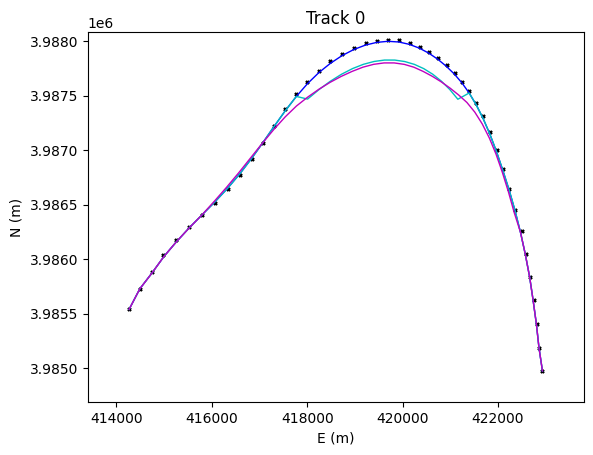

In [5]:
track.plot('kx')
plt.ylim([3986100, 3986800])

# Filtrage par noyau fenetre glissante de taille 5
track1 = tkl.filter_seq(track, kernel=5, dim=tkl.FILTER_XY)
track1.plot('b-')

# Filtrage par noyau gaussien
track2 = tkl.filter_seq(track, kernel=tkl.GaussianKernel(5), dim=tkl.FILTER_XY)
track2.plot('c-')

# Filtrage par noyau triangulaire
track3 = tkl.filter_seq(track, kernel=tkl.TriangularKernel(5), dim=tkl.FILTER_XY)
track3.plot('m-')


plt.show()

## Application à la détection des lacets